Con el fin de clasificar las distintas actividades que puede realizar una persona, se realizó un experimento a un grupo de 30 voluntarios dentro de un grupo de edad de 19 a 48 años. Cada persona realizó seis actividades (CAMINAR,
CAMINAR POR LAS ESCALERAS, BAJAR LAS ESCALERAS, SENTARSE, DE PIE,
RECOSTARSE) con un smartphone (Samsung Galaxy S II) conectado en su
cintura. Usando el acelerómetro y giroscopio integrados en el smartphone, se
tienen la siguiente data:

- Aceleración triaxial del acelerómetro (aceleración total) y la aceleración corporal estimada.
- Velocidad angular triaxial del giroscopio.
- Variables de dominio de tiempo y frecuencia.
- Su etiqueta de actividad.
- Un identificador del sujeto que realizó el experimento.

El conjunto de datos obtenido se ha dividido aleatoriamente en dos conjuntos
(train y test), donde se seleccionó al 70% de los voluntarios para generar los
datos de entrenamiento y al 30% los datos de la prueba.

Estos datos se encuentran en los siguientes links:

train: https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/train.csv

test: https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/test.csv

Para esta actividad, realice lo siguiente:
1. Cargue los set de datos de entrenamiento y prueba. ¿Cuáles son las
dimensiones de estos set de datos?

In [1]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [2]:
file = 'https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/train.csv'
df = pd.read_csv(file)
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [3]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [4]:
file = 'https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/test.csv'
df1 = pd.read_csv(file)
df1

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


In [5]:
df1.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


Las dimensiones de estos set de datos son X, Y y Z, ademas de valores como la gravedad, el sujeto y la actividad que se esta realizando. 

2. Estudie la cantidad de registros que hay en cada actividad en el set de entrenamiento. Para esto, una opción es utilizar la función de pandas crosstab(index=columna, columns="count"). ¿Cómo se encuentran repartidas las Actividades? ¿Existe algún desbalance en las categorías? (realice un gráfico que acompañe su análisis) Comente.

In [6]:
print(df.shape)
print(df1.shape)

(7352, 563)
(2947, 563)


In [7]:
pd.crosstab(df['Activity'], df['Activity'], margins=True)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
Activity,,,,,,,
LAYING,1407,0,0,0,0,0,1407
SITTING,0,1286,0,0,0,0,1286
STANDING,0,0,1374,0,0,0,1374
WALKING,0,0,0,1226,0,0,1226
WALKING_DOWNSTAIRS,0,0,0,0,986,0,986
WALKING_UPSTAIRS,0,0,0,0,0,1073,1073
All,1407,1286,1374,1226,986,1073,7352


In [8]:
pd.crosstab(df['Activity'], df['subject'], margins=True)

subject,1,3,5,6,7,8,11,14,15,16,...,21,22,23,25,26,27,28,29,30,All
Activity,,,,,,,,,,,,,,,,,,,,,
LAYING,50,62,52,57,52,54,57,51,72,70,...,90,72,72,73,76,74,80,69,70,1407
SITTING,47,52,44,55,48,46,53,54,59,69,...,85,62,68,65,78,70,72,60,62,1286
STANDING,53,61,56,57,53,54,47,60,53,78,...,89,63,68,74,74,80,79,65,59,1374
WALKING,95,58,56,57,57,48,59,59,54,51,...,52,46,59,74,59,57,54,53,65,1226
WALKING_DOWNSTAIRS,49,49,47,48,47,38,46,45,42,47,...,45,36,54,58,50,44,46,48,62,986
WALKING_UPSTAIRS,53,59,47,51,51,41,54,54,48,51,...,47,42,51,65,55,51,51,49,65,1073
All,347,341,302,325,308,281,316,323,328,366,...,408,321,372,409,392,376,382,344,383,7352


Activity
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
Name: Activity, dtype: int64


Text(0, 0.5, 'y: Cantidad de muestras')

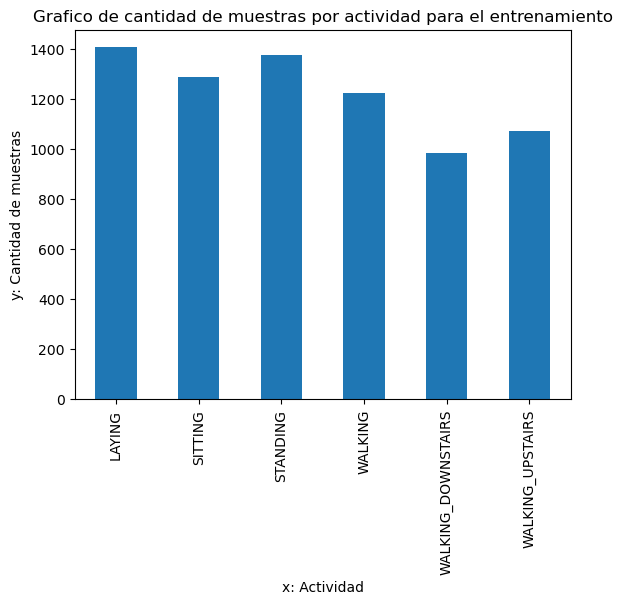

In [9]:
df_1 = df.groupby(["Activity"])['Activity'].count()
print(df_1)
df_1.plot(kind="bar");
plt.title('Grafico de cantidad de muestras por actividad para el entrenamiento')
plt.xlabel('x: Actividad')
plt.ylabel('y: Cantidad de muestras')

In [10]:
pd.crosstab(df1['Activity'], df1['Activity'], margins=True)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
Activity,,,,,,,
LAYING,537,0,0,0,0,0,537
SITTING,0,491,0,0,0,0,491
STANDING,0,0,532,0,0,0,532
WALKING,0,0,0,496,0,0,496
WALKING_DOWNSTAIRS,0,0,0,0,420,0,420
WALKING_UPSTAIRS,0,0,0,0,0,471,471
All,537,491,532,496,420,471,2947


In [11]:
pd.crosstab(df1['Activity'], df1['subject'], margins=True)

subject,2,4,9,10,12,13,18,20,24,All
Activity,,,,,,,,,,
LAYING,48,54,50,58,60,62,65,68,72,537
SITTING,46,50,50,54,51,49,57,66,68,491
STANDING,54,56,45,44,61,57,73,73,69,532
WALKING,59,60,52,53,50,57,56,51,58,496
WALKING_DOWNSTAIRS,47,45,42,38,46,47,55,45,55,420
WALKING_UPSTAIRS,48,52,49,47,52,55,58,51,59,471
All,302,317,288,294,320,327,364,354,381,2947


Activity
LAYING                537
SITTING               491
STANDING              532
WALKING               496
WALKING_DOWNSTAIRS    420
WALKING_UPSTAIRS      471
Name: Activity, dtype: int64


Text(0, 0.5, 'y: Cantidad de muestras')

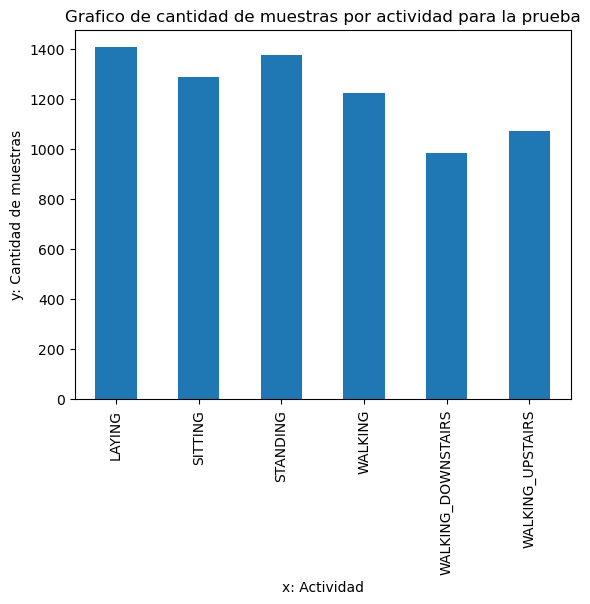

In [12]:
df_2 = df1.groupby(["Activity"])['Activity'].count()
print(df_2)
df_1.plot(kind="bar");
plt.title('Grafico de cantidad de muestras por actividad para la prueba')
plt.xlabel('x: Actividad')
plt.ylabel('y: Cantidad de muestras')

Respecto a como estan repartidas las actividades, existe un desbalance entre categorias, ya que no todas tienen el mismo numero de muestras, destacandoq eu existen mayores datos desde la categoria: Descansar, Sentarse, Estar parados, Caminar, bajar las escaleras y por ultimo subir las escaleras. 

3. Defina X_train y X_test como corresponda (omitiendo las variables que no corresponden a variables predictoras).

In [13]:
X_train1 = df[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 
        'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
        'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
        'tBodyAcc-max()-X', 'fBodyBodyGyroJerkMag-kurtosis()', 
        'angle(tBodyAccMean,gravity)','angle(tBodyAccJerkMean),gravityMean)', 
        'angle(tBodyGyroMean,gravityMean)', 'angle(tBodyGyroJerkMean,gravityMean)', 
        'angle(X,gravityMean)', 'angle(Y,gravityMean)', 'angle(Z,gravityMean)'
       ]].values
X_train1

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [ 0.27841883, -0.01641057, -0.12352019, ..., -0.8447876 ,
         0.18028889, -0.05431672],
       [ 0.27965306, -0.01946716, -0.11346169, ..., -0.84893347,
         0.18063731, -0.04911782],
       ...,
       [ 0.27338737, -0.01701062, -0.04502183, ..., -0.77913261,
         0.24914484,  0.04081119],
       [ 0.28965416, -0.01884304, -0.15828059, ..., -0.78518142,
         0.24643223,  0.02533948],
       [ 0.35150347, -0.01242312, -0.20386717, ..., -0.78326693,
         0.24680852,  0.03669484]])

In [14]:
X_test1 = df1[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 
        'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
        'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
        'tBodyAcc-max()-X', 'fBodyBodyGyroJerkMag-kurtosis()', 
        'angle(tBodyAccMean,gravity)','angle(tBodyAccJerkMean),gravityMean)', 
        'angle(tBodyGyroMean,gravityMean)', 'angle(tBodyGyroJerkMean,gravityMean)', 
        'angle(X,gravityMean)', 'angle(Y,gravityMean)', 'angle(Z,gravityMean)'
       ]].values
X_test1

array([[ 0.25717778, -0.02328523, -0.01465376, ..., -0.72000927,
         0.27680104, -0.0579783 ],
       [ 0.28602671, -0.01316336, -0.11908252, ..., -0.69809082,
         0.28134292, -0.08389801],
       [ 0.27548482, -0.02605042, -0.11815167, ..., -0.70277146,
         0.28008303, -0.0793462 ],
       ...,
       [ 0.34996609,  0.03007744, -0.11578796, ..., -0.65535684,
         0.27447878,  0.18118355],
       [ 0.23759383,  0.01846687, -0.09649893, ..., -0.65971859,
         0.26478161,  0.18756291],
       [ 0.15362719, -0.01843651, -0.13701846, ..., -0.66008023,
         0.26393619,  0.1881034 ]])

4. Estandarice el set de features de entrenamiento y prueba. Puede utilizar la función StandardScaler: 

    from sklearn.preprocessing import StandardScaler
    x_stand = StandardScaler().fit_transform(x)

In [15]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train1)
X_test = StandardScaler().fit_transform(X_test1)
print(X_train)
print(X_test)

[[ 0.20064157 -0.0636826  -0.41962845 ... -0.68721921  0.40794614
  -0.00756789]
 [ 0.05594788  0.03148567 -0.25390836 ... -0.694138    0.40911698
   0.00787517]
 [ 0.07351535 -0.04341648 -0.07629468 ... -0.702239    0.4102883
   0.02650234]
 ...
 [-0.01566765  0.0167814   1.13222107 ... -0.56584847  0.64059683
   0.34870928]
 [ 0.21586648 -0.02812252 -0.86770988 ... -0.57766781  0.63147758
   0.29327564]
 [ 1.09620157  0.12919873 -1.67268082 ... -0.57392691  0.63274259
   0.33396081]]
[[-0.2777081  -0.21063123  2.19307573 ... -0.40479042  0.62272321
  -0.0383485 ]
 [ 0.19865964  0.18259066 -0.25026383 ... -0.36173867  0.63673075
  -0.14570918]
 [ 0.02458676 -0.31805537 -0.22848456 ... -0.37093228  0.63284514
  -0.12685534]
 ...
 [ 1.25445818  1.86244113 -0.17318039 ... -0.27780151  0.61556116
   0.95227139]
 [-0.60108793  1.41138509  0.27812868 ... -0.28636876  0.58565426
   0.97869501]
 [-1.98758645 -0.02226443 -0.66991444 ... -0.28707909  0.58304691
   0.98093374]]


5. Defina y_train e y_test como corresponda (recuerde que debe estar codificada numéricamente). Para recodificar un vector o columna y de varias categorías a formato numérico puede utilizar:

from sklearn import preprocessing
encoder=preprocessing.LabelEncoder().fit(y)
y_new=encodertrain.transform(y)

In [16]:
from sklearn import preprocessing
y = df1['Activity'].values
print(y)
encoder = preprocessing.LabelEncoder().fit(y)
y_test = encoder.transform(y)
print(y_test)

['STANDING' 'STANDING' 'STANDING' ... 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS']
[2 2 2 ... 5 5 5]


In [17]:
from sklearn import preprocessing
y = df['Activity'].values
print(y)
encoder = preprocessing.LabelEncoder().fit(y)
y_train = encoder.transform(y)
print(y_train)

['STANDING' 'STANDING' 'STANDING' ... 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS']
[2 2 2 ... 5 5 5]


6. Utilice la función GridSearchCV para realizar 10 validaciones cruzadas con la lista de parámetros definida anteriormente. Determine la mejor combinación de parámetros y obtenga el modelo con dichos parámetros.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.svm import SVR

In [19]:
# creamos los diccionarios sobre los que exploraremos
tuned_parameters = [
    {"kernel": ["linear"]},
    {"kernel": ["poly"], "degree": [2, 3]},
    {"kernel": ["rbf"]},
]


In [20]:
clf = GridSearchCV(SVR(), tuned_parameters, cv=10,scoring= 'r2')
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid=[{'kernel': ['linear']},
                         {'degree': [2, 3], 'kernel': ['poly']},
                         {'kernel': ['rbf']}],
             scoring='r2')

7. ¿Cómo es la capacidad predictiva de este modelo en el set de prueba? Comente.

In [21]:
print("Mejor conjunto de parámetros:")
print()
print(clf.best_params_)
print()
print("Media y desviación:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Mejor conjunto de parámetros:

{'kernel': 'rbf'}

Media y desviación:

0.856 (+/-0.116) for {'kernel': 'linear'}
0.722 (+/-0.139) for {'degree': 2, 'kernel': 'poly'}
0.488 (+/-0.954) for {'degree': 3, 'kernel': 'poly'}
0.903 (+/-0.051) for {'kernel': 'rbf'}


La mejor capacidad predictiva del set de prueba es mejor en los conjuntos de parametros de Kernel y rbf. 